In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import pandas as pd

colors = list(dict(mcolors.TABLEAU_COLORS, **mcolors.CSS4_COLORS).keys())

fig, ax = plt.subplots()

df_gm = pd.read_csv("neuropeptides_ds1_normalized-yes_geometric_median.csv", index_col=0)

if not df_gm.empty:

    unames = df_gm.type.unique()

    for i in range(len(unames)):
        df_filtered = df_gm.loc[df_gm.name.apply(lambda x: unames[i] in x), :]
        ax.scatter(df_filtered.x1,
                   df_filtered.x2,
                   c=colors[i],
                   label=f"{unames[i]}",
                   alpha=0.2,
                   marker=".")

    for i in range(len(unames)):
        df_filtered = df_gm.loc[df_gm.name.apply(lambda x: unames[i] in x), :]
        df_filtered = df_filtered.loc[df_filtered["min_gm"].apply(lambda x: x == True), :]
        ax.scatter(df_filtered.x1,
                   df_filtered.x2,
                   marker="s",
                   s=70,
                   label=f"(geom. median)",
                   c=colors[i])
        if not df_filtered.empty:
            ax.text(df_filtered.x1.values[0],
                    df_filtered.x2.values[0] - (0.2 * df_filtered.x2.values[0]),
                    df_filtered.name.values[0],
                    ha="center")

    ax.legend(ncol=3, bbox_to_anchor=(1, 1), loc="upper left")
    ax.grid(True)

    fig = plt.gcf()
    fig.set_size_inches(20, 13)

    plt.subplots_adjust(right=0.75)
    # plt.title(f"{snakemake.wildcards.dataset}" + \
    #           f"{', normalized, ' if snakemake.wildcards.normalized == 'yes' else ', ' }" +
    #           f"TSNE")
    # plt.show()
    

FileNotFoundError: [Errno 2] File b'neuropeptides_ds1_normalized-yes_geometric_median.csv' does not exist: b'neuropeptides_ds1_normalized-yes_geometric_median.csv'

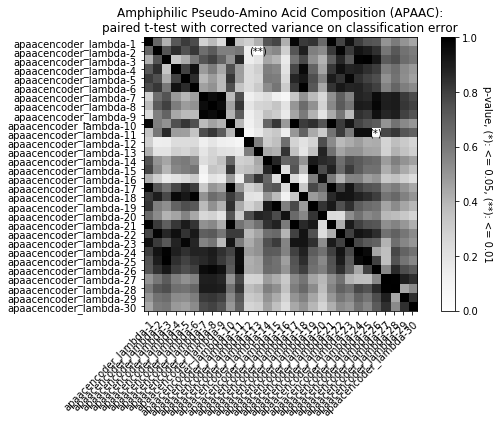

In [19]:
import matplotlib
import numpy as np
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

res = pd.read_csv("00_data/out/neuropeptides/neuropeptides_ds1/encodings/apaac/cv/neuropeptides_ds1_normalized-yes_ttest_error.csv", index_col=0)

res.iloc[10, 25] = 0.04
res.iloc[1, 12] = 0.001

# https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
fig, ax = plt.subplots()
pc = ax.imshow(res.values, vmin=0, vmax=1, cmap='Greys')
ax.set_xticks(np.arange(len(res.columns)))
ax.set_yticks(np.arange(len(res.index)))
ax.set_xticklabels(res.columns)
ax.set_yticklabels(res.index)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

cbar = ax.figure.colorbar(pc)
cbar.ax.set_ylabel("p-value, (*): <= 0.05, (**): <= 0.01", rotation=-90, va="bottom")

for i in range(len(res.index)):
    for j in range(len(res.columns)):
        if res.loc[res.index[i], res.columns[j]] <= 0.01:
            ax.text(j, i, "(**)", ha="center", va="center", color="black")
        elif res.loc[res.index[i], res.columns[j]] <= 0.05:
            ax.text(j, i, "(*)", ha="center", va="center", color="black")

fig.tight_layout()
fig.set_size_inches(9, 7)

plt.title("Amphiphilic Pseudo-Amino Acid Composition (APAAC):\n" +
          "paired t-test with corrected variance on classification error")

plt.savefig("test.svg", bbox_inches="tight")